
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_excel('data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [5]:
data.head(3)

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе


In [8]:
# Замена названий столбцов, приведение их к общему виду
new_columns = []
for column in data.columns:
    new_columns.append(column.lower().replace(' ', '_'))
data.columns = new_columns
data.rename(columns = {'продажи_факт,_тыс.руб' : 'продажи_факт_тыс.руб', 'продажи_план,_тыс.руб' : 'продажи_план_тыс.руб'}, inplace = True)
data.head(3)


,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,продажи_факт_тыс.руб,продажи_план_тыс.руб,дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе


In [ ]:
# Проверка пропущенных значений
data.isna().sum()

In [ ]:
# Заполнение пропусков
data['дата_оплаты'] = data['дата_оплаты'].fillna('0000-00-00')

In [9]:
# Изменение типов данных
data['дата_оплаты'] = pd.to_datetime(data['дата_оплаты'], errors = 'coerce')
data['дней_между_сделкой_и_оплатой'] = pd.to_numeric(data['дней_между_сделкой_и_оплатой'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   номер_заказа                  116 non-null    int64         
 1   канал_продаж                  116 non-null    object        
 2   продуктовый_сегмент           116 non-null    object        
 3   менеджер                      116 non-null    object        
 4   название_заказа               116 non-null    object        
 5   продавец                      116 non-null    object        
 6   город                         116 non-null    object        
 7   продажи_факт_тыс.руб          116 non-null    int64         
 8   продажи_план_тыс.руб          116 non-null    int64         
 9   дата_сделки                   116 non-null    datetime64[ns]
 10  дата_оплаты                   93 non-null     datetime64[ns]
 11  дней_между_сделкой_и_оплатой  93

In [11]:
# Подсчет продаж по каждому городу
data['суммарные_фактические_продажи'] = data.groupby('город')['продажи_факт_тыс.руб'].transform('sum')
data.head(3)

,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,продажи_факт_тыс.руб,продажи_план_тыс.руб,дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус,суммарные_фактические_продажи
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52.0,Закрыто,1370
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15.0,Закрыто,1370
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,NaN,В процессе,1370


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [15]:
# Подсчет динамики выполнения плана
monthly_performance = data.groupby([pd.Grouper(key='дата_сделки', freq='M'), 'менеджер'])['продажи_факт_тыс.руб'].sum() / data.groupby([pd.Grouper(key='дата_сделки', freq='M'), 'менеджер'])['продажи_план_тыс.руб'].sum()
print(monthly_performance)

дата_сделки  менеджер 
2019-06-30   А. Фостер    0.000000
2019-07-31   Т. Ли        0.000000
2019-10-31   Т. Ли        0.700000
2019-11-30   М. Баили     0.620000
2019-12-31   М. Баили     0.262857
2020-01-31   А. Фостер    1.575000
             М. Баили     1.806429
             Р. Хайерс    0.545000
             Т. Ли        0.350000
2020-02-29   А. Перри     0.650000
             А. Фостер    0.866667
             М. Баили     0.780000
             Р. Хайерс    0.997524
             С. Милер     0.420000
2020-03-31   А. Фостер    1.250000
             М. Баили     0.764923
             Р. Хайерс    0.770000
             С. Милер     0.635000
             Т. Ли        0.500000
2020-04-30   М. Баили     0.520000
             Р. Хайерс    0.545000
             Т. Ли        0.600000
2020-05-31   М. Баили     0.677500
             Р. Хайерс    1.450000
             С. Милер     0.570000
2020-06-30   М. Баили     0.000000
             Р. Хайерс    0.473750
             С. Милер     0.0000

<Figure size 1000x600 with 0 Axes>

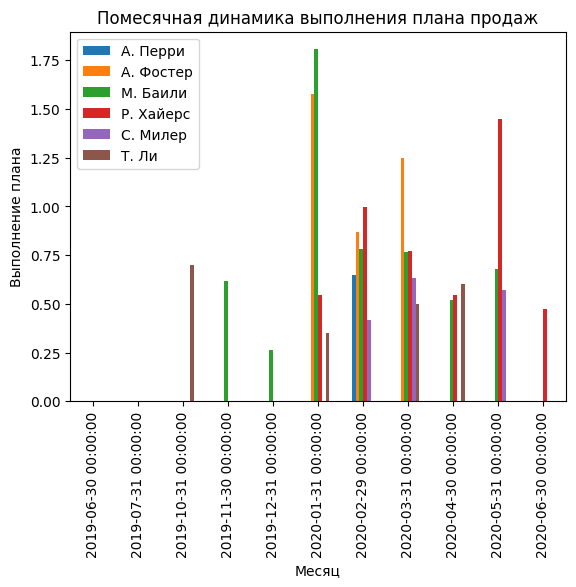

In [16]:
# Построение графика
plt.figure(figsize=(10, 6))
monthly_performance.unstack().plot(kind='bar')
plt.xlabel('Месяц')
plt.ylabel('Выполнение плана')
plt.title('Помесячная динамика выполнения плана продаж')
plt.legend()
plt.show()

In [17]:
# Подсчет сезонный просадок
avg_monthly_performance = monthly_performance.mean(level=0)
avg_overall_performance = monthly_performance.mean()
print(f'Среднее выполнение плана по месяцам: {avg_monthly_performance}')
print(f'Общее среднее выполнение плана: {avg_overall_performance}')

Среднее выполнение плана по месяцам: дата_сделки
2019-06-30    0.000000
2019-07-31    0.000000
2019-10-31    0.700000
2019-11-30    0.620000
2019-12-31    0.262857
2020-01-31    1.069107
2020-02-29    0.742838
2020-03-31    0.783985
2020-04-30    0.555000
2020-05-31    0.899167
2020-06-30    0.118438
dtype: float64
Общее среднее выполнение плана: 0.6320568712896298


C:\Users\jilie\AppData\Local\Temp\ipykernel_10864\909148079.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  avg_monthly_performance = monthly_performance.mean(level=0)


In [18]:
# Оценка важности периодов
period_sales = data.groupby('дата_сделки')['продажи_факт_тыс.руб'].sum()
total_sales = data['продажи_факт_тыс.руб'].sum()
print(f'Доля продаж по периодам: {period_sales / total_sales}')

Доля продаж по периодам: дата_сделки
2019-06-03    0.000000
2019-07-03    0.000000
2019-10-04    0.010415
2019-11-04    0.009225
2019-12-02    0.011605
                ...   
2020-06-17    0.043743
2020-06-18    0.043743
2020-06-19    0.025293
2020-06-20    0.000000
2020-06-27    0.000000
Name: продажи_факт_тыс.руб, Length: 62, dtype: float64


In [19]:
# Изменение продаж по сегментам
segment_sales = data.groupby('продуктовый_сегмент')['продажи_факт_тыс.руб'].sum()
total_sales = data['продажи_факт_тыс.руб'].sum()
print(f'Доля продаж по сегментам: {segment_sales / total_sales}')

Доля продаж по сегментам: продуктовый_сегмент
Автозапчасти              0.010415
Бассейн                   0.022318
Другое                    0.107497
Игрушки                   0.003720
Косметика                 0.002976
Медецина                  0.005951
Оборудование              0.522221
Одежда                    0.069185
Охота и рыбалка           0.000000
Свет                      0.103406
Спорт товары              0.011159
Сувениры                  0.014432
Ткань и аксессуары        0.084986
Упаковка                  0.010043
Электронные устройства    0.031691
Name: продажи_факт_тыс.руб, dtype: float64


In [21]:
# География продаж
region_sales = data.groupby('город')['продажи_факт_тыс.руб'].sum()
total_sales = data['продажи_факт_тыс.руб'].sum()
print(f'Доля продаж по регионам: {region_sales / total_sales}')

Доля продаж по регионам: город
Волгоград          0.063234
Казань             0.119623
Кемерово           0.022318
Курск              0.010415
Липецк             0.000000
Магнитогорск       0.114267
Москва             0.055303
Нижний Новгород    0.024326
Новосибирск        0.085180
Омск               0.003720
Оренбург           0.040916
Пермь              0.011456
Самара             0.082933
Санкт-Петербург    0.020384
Саратов            0.006398
Севастополь        0.000000
Сочи               0.103406
Стоврополь         0.000000
Тула               0.027525
Улан-Удэ           0.014432
Уфа                0.064722
Челябинск          0.129443
Ярославль          0.000000
Name: продажи_факт_тыс.руб, dtype: float64


In [22]:
# Влияние канала продаж
channel_sales = data.groupby('канал_продаж')['продажи_факт_тыс.руб'].sum()
total_sales = data['продажи_факт_тыс.руб'].sum()
print(f'Доля продаж по каналам: {channel_sales / total_sales}')

Доля продаж по каналам: канал_продаж
Вебсайт                0.011903
Выставка               0.426180
Контекстная реклама    0.036452
Почта                  0.023062
Рекомендация           0.268334
Холодный звонок        0.234069
Name: продажи_факт_тыс.руб, dtype: float64


In [23]:
# Анализ товарных категорий
category_sales = data.groupby('название_заказа')['продажи_факт_тыс.руб'].sum()
total_sales = data['продажи_факт_тыс.руб'].sum()
print(f'Доля продаж по категориям: {category_sales / total_sales}')

Доля продаж по категориям: название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       0.034221
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    0.025293
AO 9852 - 7 / A 7971 B -7                  0.014581
C 906 MX 67/AE 5350 67                     0.008109
C 909 HA / AE 1720                         0.014581
                                             ...   
Упаковка (Poland)                          0.002157
Упаковка mix                               0.006695
Швейная фурнитура                          0.009820
Экструзионный пластометр                   0.010415
Электронные устройства                     0.008927
Name: продажи_факт_тыс.руб, Length: 92, dtype: float64


In [24]:
# Популярные товарные категории по числу клиентов
category_clients = data.groupby('название_заказа')['номер_заказа'].nunique()
total_clients = data['номер_заказа'].nunique()
print(f'Доля клиентов по категориям: {category_clients / total_clients}')

Доля клиентов по категориям: название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       0.034483
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    0.017241
AO 9852 - 7 / A 7971 B -7                  0.008621
C 906 MX 67/AE 5350 67                     0.008621
C 909 HA / AE 1720                         0.008621
                                             ...   
Упаковка (Poland)                          0.008621
Упаковка mix                               0.008621
Швейная фурнитура                          0.017241
Экструзионный пластометр                   0.017241
Электронные устройства                     0.017241
Name: номер_заказа, Length: 92, dtype: float64


In [25]:
# Топ-5 товарных категорий по продажам
top_5_categories_sales = category_sales.nlargest(5)
print(top_5_categories_sales)

название_заказа
Влагостойкая одежда                     3900
"NINGBO YOURLITE IMP AND EXP CO.,LTD    2300
К581НО-67 / АЕ6868-67                   2200
Kapego                                  2000
Гидромотор экскаватора  (KAWASAKI)      2000
Name: продажи_факт_тыс.руб, dtype: int64


In [26]:
# Топ-5 товарных категорий по числу клиентов
top_5_categories_clients = category_clients.nlargest(5)
print(top_5_categories_clients)

название_заказа
"NINGBO YOURLITE IMP AND EXP CO.,LTD       4
HAINING TIANYI TEXTILE CO.,LTD             4
Ткань 40HC Shanghai                        3
ALCOM HOLDING INTERNATIONAL CO.,LIMITED    2
MATERIAL DISCOVERY CO.,LTD                 2
Name: номер_заказа, dtype: int64


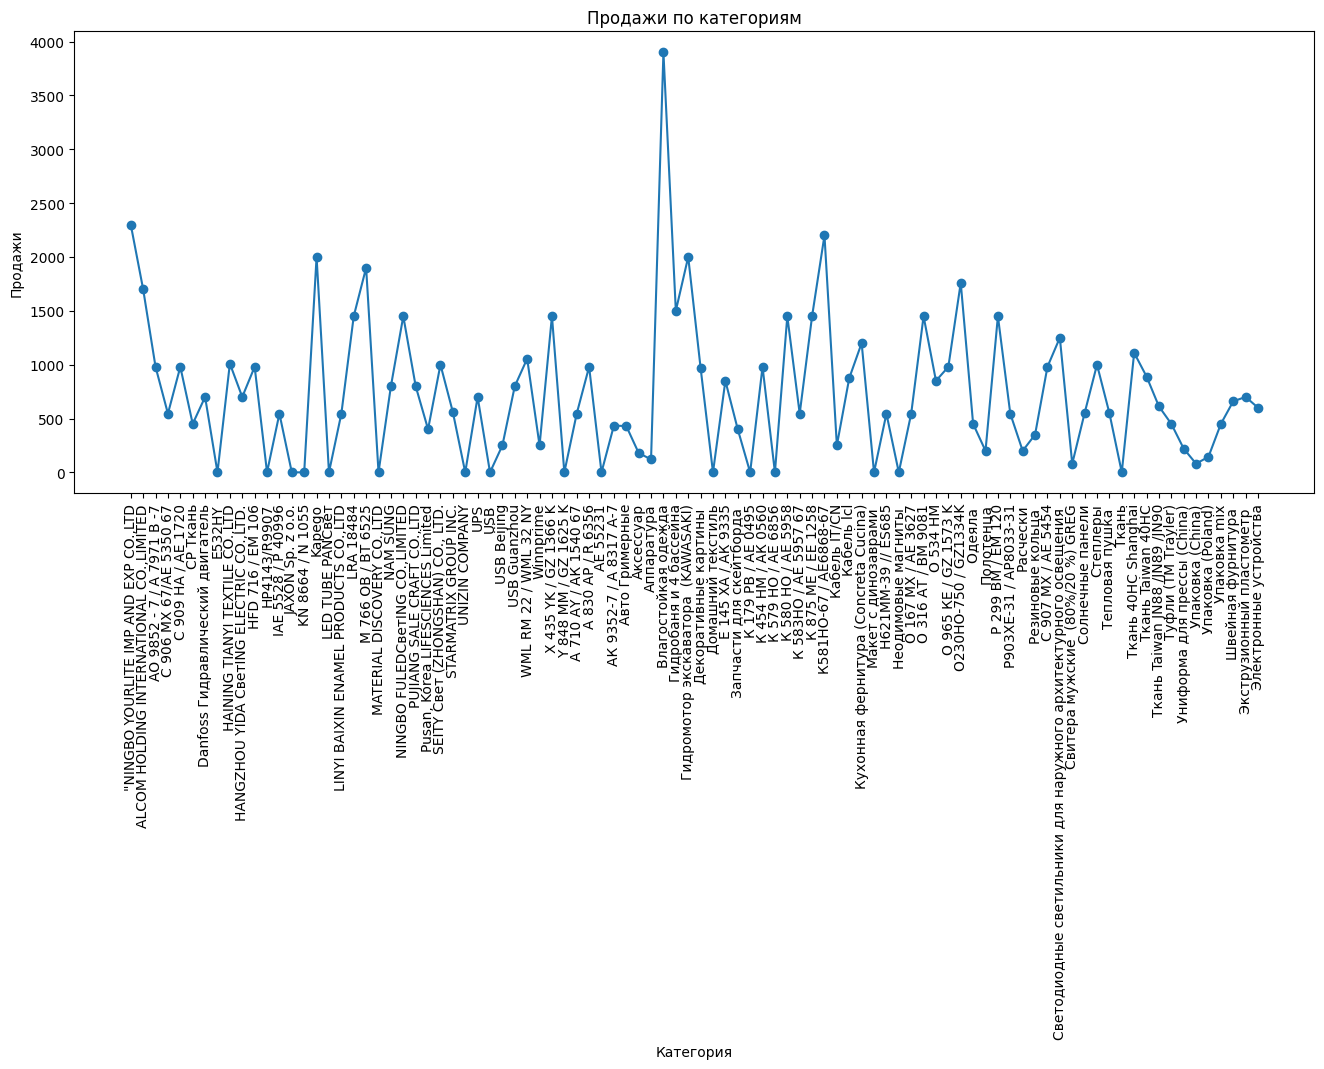

In [37]:
plt.figure(figsize=(16, 6))
plt.plot(category_sales.index, category_sales.values, marker='o')
plt.xlabel('Категория')
plt.ylabel('Продажи')
plt.title('Продажи по категориям')
plt.xticks(rotation=90)
plt.show()

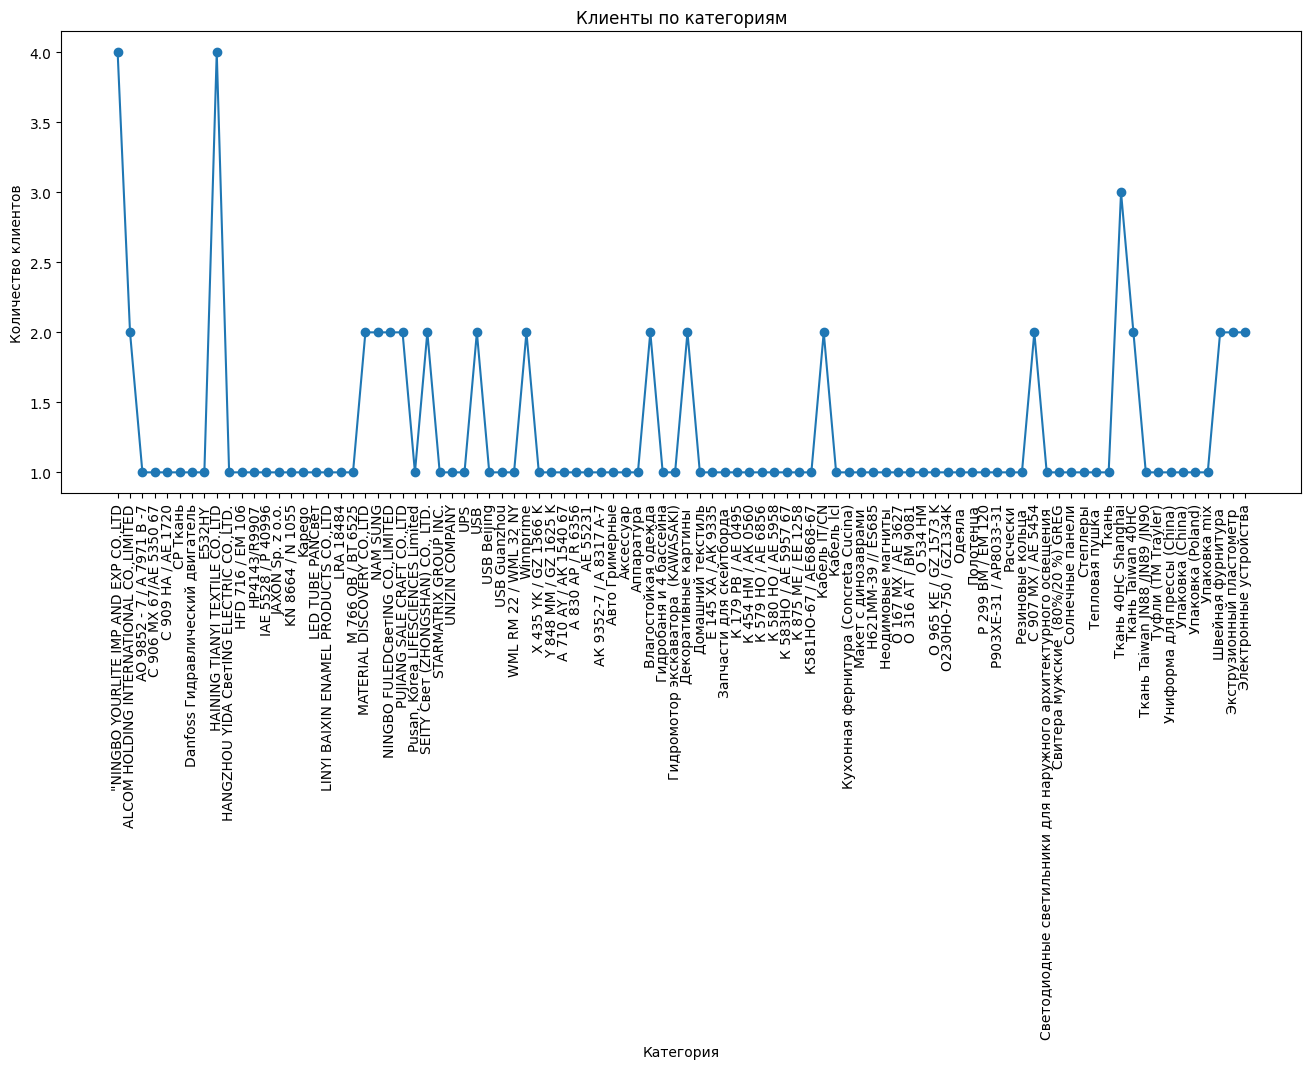

In [38]:
# График распределения клиентов по категориям
plt.figure(figsize=(16, 6))
plt.plot(category_clients.index, category_clients.values, marker='o')
plt.xlabel('Категория')
plt.ylabel('Количество клиентов')
plt.title('Клиенты по категориям')
plt.xticks(rotation=90)
plt.show()

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

На основе проведенного анализа можно сделать следующие выводы:

 - Профилирование менеджеров по товарным категориям: Анализ показал, что некоторые товарные категории имеют более высокий спрос и приносят больше дохода. Профилирование менеджеров по товарным категориям может помочь компании более эффективно использовать их навыки и опыт для увеличения продаж и дохода.
 - Профилирование менеджеров по каналам продаж: Анализ также показал, что некоторые каналы продаж имеют более высокий спрос и приносят больше дохода. Профилирование менеджеров по каналам продаж может помочь компании более эффективно использовать их навыки и опыт для увеличения продаж и дохода.
 - Расширение самых доходных каналов продаж: Анализ показал, что некоторые каналы продаж имеют более высокий спрос и приносят больше дохода. Расширение этих каналов продаж может помочь компании увеличить свой доход и улучшить свою позицию на рынке.
 - Расширение регионов с высоким спросом: Анализ показал, что некоторые регионы имеют более высокий спрос на товары и услуги компании. Расширение деятельности в этих регионах может помочь компании увеличить свой доход и улучшить свою позицию на рынке.
Рекомендации

На основе этих выводов, мы рекомендуем компании:

 - Профилировать менеджеров по товарным категориям и каналам продаж для более эффективного использования их навыков и опыта.
 - Расширять самые доходные каналы продаж и регионы с высоким спросом для увеличения дохода и улучшения позиции на рынке.
 - Продолжать мониторить и анализировать данные для выявления новых возможностей и тенденций на рынке.
 - Разрабатывать стратегии для увеличения продаж и дохода в наиболее перспективных регионах и каналах продаж.
 - План действий

Для реализации этих рекомендаций, мы предлагаем следующий план действий:

 - Провести профилирование менеджеров по товарным категориям и каналам продаж в течение следующих 3 месяцев.
 - Разработать стратегии для расширения самых доходных каналов продаж и регионов с высоким спросом в течение следующих 6 месяцев.
 - Продолжать мониторить и анализировать данные для выявления новых возможностей и тенденций на рынке.
 - Провести оценку эффективности реализованных стратегий и планов в течение следующих 12 месяцев.
